## Домашнее задание 3.
### Предсказание дефектов стальных плит

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pls
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
 

In [2]:
train_df = pd.read_csv('train_steel.csv')
test_df = pd.read_csv('test_steel.csv')

In [3]:
train_df.head(5)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [5]:
train_df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Определение целевых признаков
target_features = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

# Фильтрация данных - оставляем только строки, где сумма целевых признаков <= 1
train_df = train_df[(train_df[target_features].sum(axis=1) <= 1)]

# Обработка признака 'Outside_Global_Index' - заменяем значения > 0.7 на 0.5
train_df['Outside_Global_Index'] = np.where(
    train_df['Outside_Global_Index'] == 0.7, 
    0.5, 
    train_df['Outside_Global_Index']
)

In [7]:
# Сохраняем id отдельно перед удалением
id_train = train_df['id']
id_test = test_df['id']

# Удаляем столбец 'id' из основного DataFrame
train_df.drop(columns='id', inplace=True)
test_df.drop(columns='id', inplace=True)

In [8]:
# Создадим единую целевую переменную (мультиклассовая)
train_df['target'] = train_df[target_features].idxmax(axis=1)
print("\nРаспределение целевой переменной:")
print(train_df['target'].value_counts())


Распределение целевой переменной:
target
Other_Faults    6540
Bumps           4761
K_Scatch        3411
Pastry          2283
Z_Scratch       1150
Stains           568
Dirtiness        485
Name: count, dtype: int64


In [9]:
X = train_df.drop(target_features + ['target'], axis=1)
y = train_df['target']

In [10]:
# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
# Определяем категориальные и числовые признаки
categorical_features = ['TypeOfSteel_A300', 'TypeOfSteel_A400']
numerical_features = [f for f in X_train.columns if f not in categorical_features]

print(f"Категориальные признаки: {categorical_features}")
print(f"Числовые признаки: {len(numerical_features)}")

# Создаем препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        ('num', RobustScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# Применяем преобразования
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Получаем названия признаков после преобразования
cat_features_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(cat_features_encoded) + numerical_features

# Создаем DataFrame с правильными названиями столбцов
X_train_processed = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=all_feature_names)

print(f"Размерность после обработки: {X_train_processed.shape}")
print("Первые 5 строк обработанных данных:")
print(X_train_processed.head(2))

Категориальные признаки: ['TypeOfSteel_A300', 'TypeOfSteel_A400']
Числовые признаки: 25
Размерность после обработки: (15358, 27)
Первые 5 строк обработанных данных:
   TypeOfSteel_A300_1  TypeOfSteel_A400_1  X_Minimum  X_Maximum  Y_Minimum  \
0                 0.0                 1.0  -0.574661  -0.669110  -0.683721   
1                 0.0                 1.0   0.427149   0.478534   1.625818   

   Y_Maximum  Pixels_Areas  X_Perimeter  Y_Perimeter  Sum_of_Luminosity  ...  \
0  -0.684292      0.381883     0.244898     0.630435           0.515195  ...   
1   1.627202     -0.106572    -0.204082    -0.086957          -0.118245  ...   

   Outside_X_Index  Edges_X_Index  Edges_Y_Index  Outside_Global_Index  \
0        -0.112903      -0.755476       0.107111                   0.0   
1        -0.177419       0.090909       0.107111                   0.0   

   LogOfAreas  Log_X_Index  Log_Y_Index  Orientation_Index  Luminosity_Index  \
0    0.409574    -0.242698     0.639879           0.6796

In [12]:
# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Исправляем импорты
from sklearn.utils import issparse
import warnings
warnings.filterwarnings('ignore')

# Пересоздадим модели с правильными параметрами
models = {
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1)
}

results = {}

print("РЕЗУЛЬТАТЫ ДО ОПТИМИЗАЦИИ:")
print("=" * 50)

for name, model in models.items():
    print(f"Обучение {name}...")
    
    # Для SVM используем масштабированные данные
    if name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)
    else:
        # Для остальных используем обработанные данные
        model.fit(X_train_processed, y_train)
        y_pred = model.predict(X_test_processed)
        y_proba = model.predict_proba(X_test_processed)
    
    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc, 'f1': f1}
    
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print("-" * 30)

РЕЗУЛЬТАТЫ ДО ОПТИМИЗАЦИИ:
Обучение SVM...
SVM:
  Accuracy: 0.5602
  ROC-AUC: 0.8501
  F1-Score: 0.5271
------------------------------
Обучение Decision Tree...
Decision Tree:
  Accuracy: 0.4771
  ROC-AUC: 0.6733
  F1-Score: 0.4783
------------------------------
Обучение Random Forest...
Random Forest:
  Accuracy: 0.5677
  ROC-AUC: 0.8573
  F1-Score: 0.5469
------------------------------


Decision Tree показывает признаки переобучения. SVM и RandomForest показали хорошие результаты. 

Подберем гиперпараметры с помощью Optuna

In [14]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

# Отключаем warnings для чистого вывода
import warnings
warnings.filterwarnings('ignore')

def objective_decision_tree(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0, 0.1)
    }
    
    model = DecisionTreeClassifier(**params, random_state=42)
    score = cross_val_score(model, X_train_processed, y_train,
                          scoring='roc_auc_ovr', cv=3, n_jobs=-1).mean()
    return score

def objective_random_forest(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    score = cross_val_score(model, X_train_processed, y_train,
                          scoring='roc_auc_ovr', cv=3, n_jobs=-1).mean()
    return score

# Оптимизация для каждой модели
studies = {}

print("ОПТИМИЗАЦИЯ С OPTUNA:")
print("=" * 50)

# Оптимизация Decision Tree
print("Оптимизация Decision Tree...")
study_dt = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study_dt.optimize(objective_decision_tree, n_trials=10, show_progress_bar=True)  # Больше trials для дерева
studies['Decision Tree'] = study_dt

# Оптимизация Random Forest
print("Оптимизация Random Forest...")
study_rf = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study_rf.optimize(objective_random_forest, n_trials=10, show_progress_bar=True)
studies['Random Forest'] = study_rf

[I 2025-08-27 16:05:52,487] A new study created in memory with name: no-name-983c6d63-9a91-4e84-bc21-1b7b623dda17


ОПТИМИЗАЦИЯ С OPTUNA:
Оптимизация Decision Tree...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-08-27 16:05:56,389] Trial 0 finished with value: 0.75637242458697 and parameters: {'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'ccp_alpha': 0.005808361216819946}. Best is trial 0 with value: 0.75637242458697.
[I 2025-08-27 16:05:58,851] Trial 1 finished with value: 0.6252019478402177 and parameters: {'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'log2', 'ccp_alpha': 0.021233911067827616}. Best is trial 0 with value: 0.75637242458697.
[I 2025-08-27 16:06:00,942] Trial 2 finished with value: 0.6252019478402177 and parameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'ccp_alpha': 0.06118528947223795}. Best is trial 0 with value: 0.75637242458697.
[I 2025-08-27 16:06:01,170] Trial 3 finished with value: 0.6252019478402177 and parameters: {'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2', 'ccp_alpha': 0.05142344384136116}.

[I 2025-08-27 16:06:02,845] A new study created in memory with name: no-name-69650b15-40aa-4e79-8bca-cc541679e1af


[I 2025-08-27 16:06:02,845] Trial 9 finished with value: 0.6252019478402177 and parameters: {'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2', 'ccp_alpha': 0.09868869366005173}. Best is trial 0 with value: 0.75637242458697.
Оптимизация Random Forest...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-08-27 16:06:10,017] Trial 0 finished with value: 0.8646877136874643 and parameters: {'n_estimators': 144, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.8646877136874643.
[I 2025-08-27 16:06:20,177] Trial 1 finished with value: 0.8654763144119718 and parameters: {'n_estimators': 200, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.8654763144119718.
[I 2025-08-27 16:06:29,541] Trial 2 finished with value: 0.8631876911603179 and parameters: {'n_estimators': 126, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.8654763144119718.
[I 2025-08-27 16:06:42,019] Trial 3 finished with value: 0.8642903025034263 and parameters: {'n_estimators': 164, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_f

In [15]:
# Создаем модели с лучшими параметрами
best_models_optuna = {
    'Decision Tree': DecisionTreeClassifier(**studies['Decision Tree'].best_params, random_state=42),
    'Random Forest': RandomForestClassifier(**studies['Random Forest'].best_params, random_state=42, n_jobs=-1)
}

optuna_results = {}

print("РЕЗУЛЬТАТЫ ПОСЛЕ OPTUNA ОПТИМИЗАЦИИ:")
print("=" * 50)

for name, model in best_models_optuna.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    optuna_results[name] = {
        'accuracy': accuracy, 
        'roc_auc': roc_auc, 
        'f1': f1,
        'params': studies[name].best_params
    }
    
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print("-" * 30)

РЕЗУЛЬТАТЫ ПОСЛЕ OPTUNA ОПТИМИЗАЦИИ:
Decision Tree:
  Accuracy: 0.4974
  ROC-AUC: 0.7394
  F1-Score: 0.3699
------------------------------
Random Forest:
  Accuracy: 0.5747
  ROC-AUC: 0.8686
  F1-Score: 0.5527
------------------------------


In [18]:
print(names)

['SVM', 'Decision Tree', 'Random Forest']


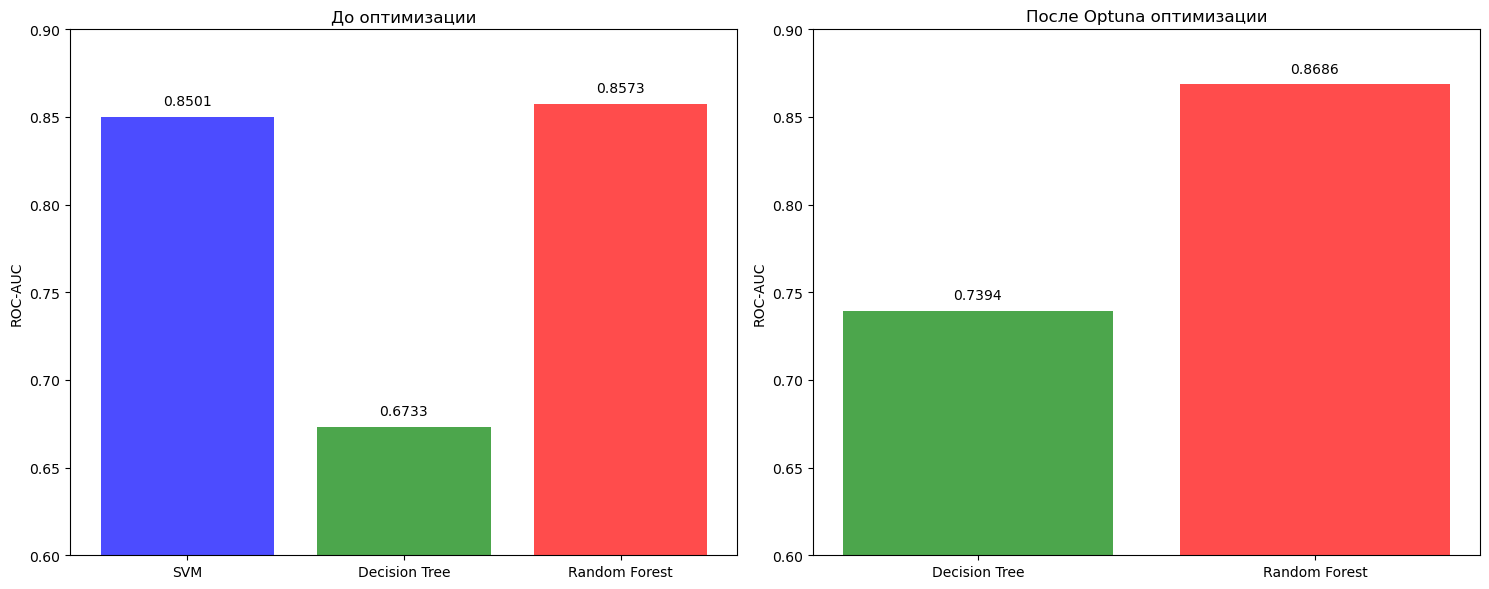

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

# До оптимизации
plt.subplot(1, 2, 1)
names = list(results.keys())
values_before = [results[name]['roc_auc'] for name in names]
bars = plt.bar(names, values_before, color=['blue', 'green', 'red'], alpha=0.7)
plt.title('До оптимизации')
plt.ylabel('ROC-AUC')
plt.ylim(0.6, 0.9)
for bar, value in zip(bars, values_before):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{value:.4f}', ha='center', va='bottom')

# После оптимизации
plt.subplot(1, 2, 2)
values_after = [optuna_results[name]['roc_auc'] for name in names[1:]]
bars = plt.bar(names[1:], values_after, color=['green', 'red'], alpha=0.7)
plt.title('После Optuna оптимизации')
plt.ylabel('ROC-AUC')
plt.ylim(0.6, 0.9)
for bar, value in zip(bars, values_after):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

SVM с помощью Optuna не оптимизировал, потому что он слишком долго обучается на моем слабом ноутбуке и при этом и так показывает хорошие результаты